# FINDRANGE -> Analisi prezzi telefoni cellulari

In [41]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score, accuracy_score, recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

In [42]:
dataFrame = pd.read_csv("dataset.csv").drop(columns=["id"])

dataFrame.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
battery_power,3000.0,1241.849000,437.063804,500.0,863.75,1232.0,1619.00,1999.0
blue,3000.0,0.502000,0.500079,0.0,0.00,1.0,1.00,1.0
clock_speed,3000.0,1.528467,0.820358,0.5,0.70,1.5,2.30,3.0
dual_sim,3000.0,0.512000,0.499939,0.0,0.00,1.0,1.00,1.0
fc,3000.0,4.404000,4.383742,0.0,1.00,3.0,7.00,19.0
four_g,3000.0,0.510000,0.499983,0.0,0.00,1.0,1.00,1.0
int_memory,3000.0,32.581667,18.152810,2.0,16.00,33.0,48.00,64.0
m_dep,3000.0,0.507000,0.285969,0.1,0.20,0.5,0.80,1.0
mobile_wt,3000.0,140.003000,35.213809,80.0,109.00,140.0,170.00,200.0
n_cores,3000.0,4.456333,2.289361,1.0,2.00,4.0,6.00,8.0


## Data Preparation

### Data Cleaning

Non ci sono valori nulli nel dataset

## Feature Selection

#### Influenza degli attributi nei confronti del prezzo

In questa sezione, sarà evidenziato quanto alcune delle caratterische del dataset influiscono sull'esito della variabile indipendente.

#### Calcoliamo il grado di influenza della 'RAM'

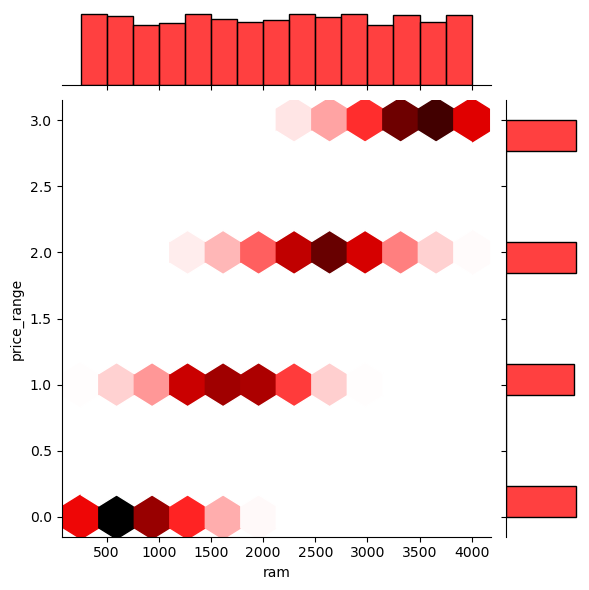

In [43]:
sns.jointplot(x='ram', y='price_range', data=dataFrame, color='red', kind='hex')

#### In questo caso la RAM influisce tanto in quanto si può vedere dal grafico che al crescere della RAM, il range da predire tende ad aumentare.
Di conseguenza non elimineremo tale attributo dal dataset.

#### Calcoliamo il grado di influenza di 'px_height' e 'px_width', i quali rappresentano informazioni circa la risoluzione dei pixel in altezza e larghezza del telefono.

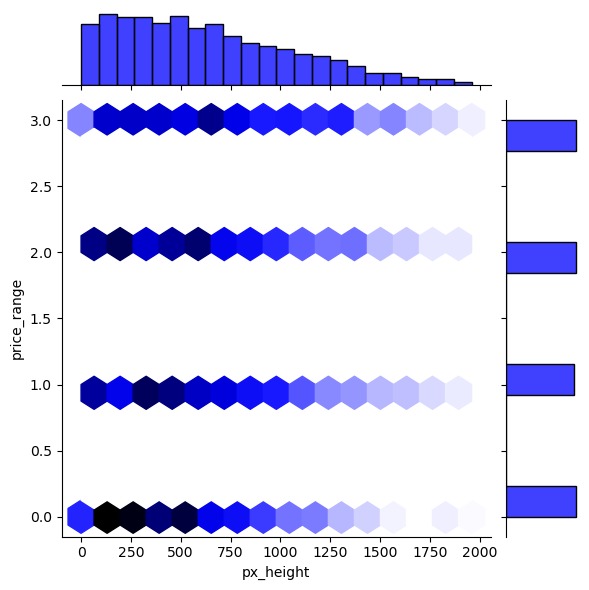

In [44]:
sns.jointplot(x='px_height', y='price_range', data=dataFrame, color='blue', kind='hex')

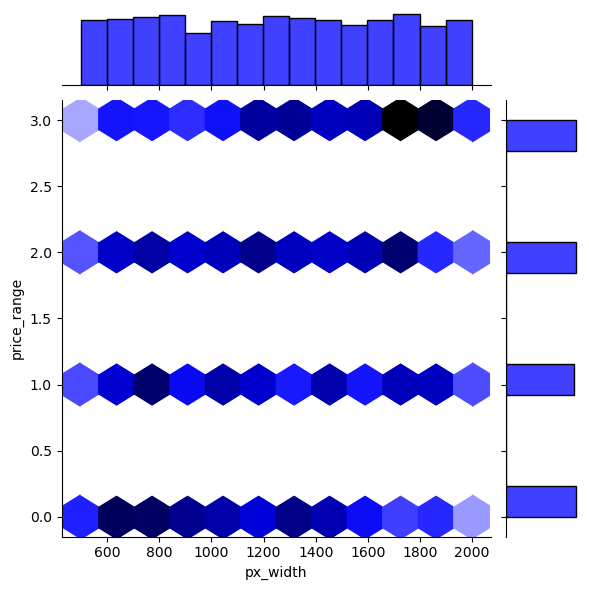

In [45]:
sns.jointplot(x='px_width', y='price_range', data=dataFrame, color='blue', kind='hex')

### La risoluzione in pixel del dispositivo non influisce affatto.
Di conseguenza rimuoveremo 'pixel_width' e 'pixel_height' dal dataset.

In [46]:
dataFrame.drop(columns=["px_width", "px_height"], inplace=True)

#### Calcoliamo il grado di influenza dell'attributo 'm_dep', il quale rappresenta la profondità del telefono cellulare.

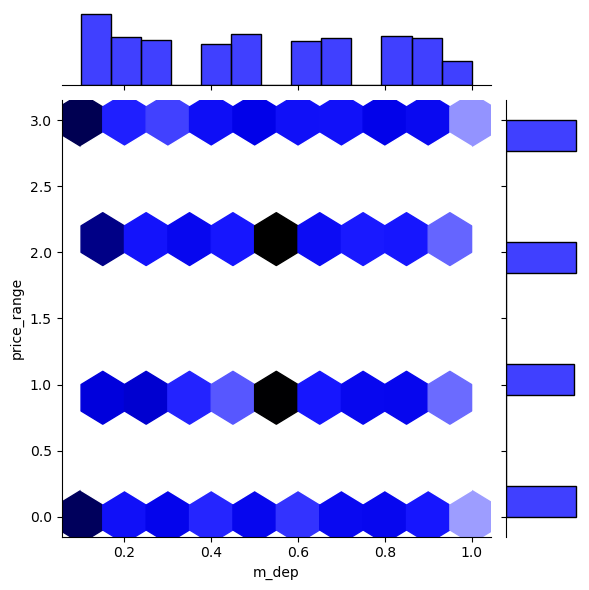

In [47]:
sns.jointplot(x='m_dep', y='price_range', data=dataFrame, color='blue', kind='hex')

#### La profondità non influisce affatto.
Di conseguenza, provvederemo a rimuovere l'attributo 'm_dep' dal dataset.

In [48]:
dataFrame.drop(columns=["m_dep"], inplace=True)

#### Calcoliamo il grado di influenza dell'attributo 'n_cores', il quale rappresenta il numero di processori del telefono cellulare.

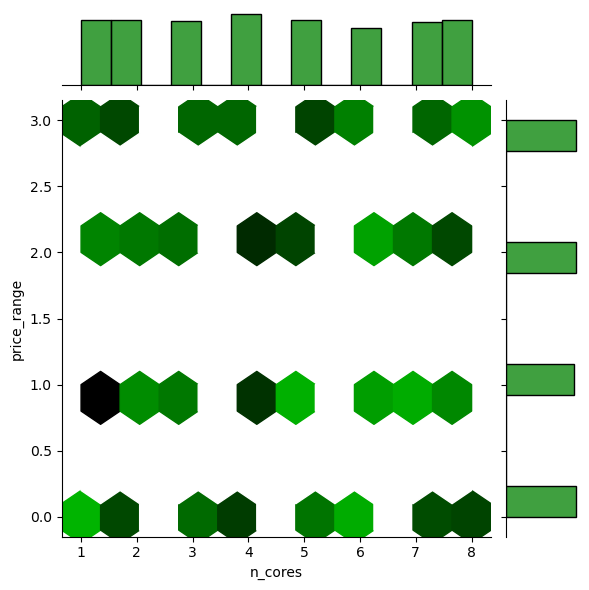

In [49]:
sns.jointplot(x='n_cores', y='price_range', data=dataFrame, color='green', kind='hex')

#### Il numero di processori non influisce affatto.
Di conseguenza, provvederemo all'eliminazione di 'n_cores' dal dataset.

In [50]:
dataFrame.drop(columns=["n_cores"], inplace=True)

#### Calcoliamo il grado di influenza dell'attributo 'mobile_wt'

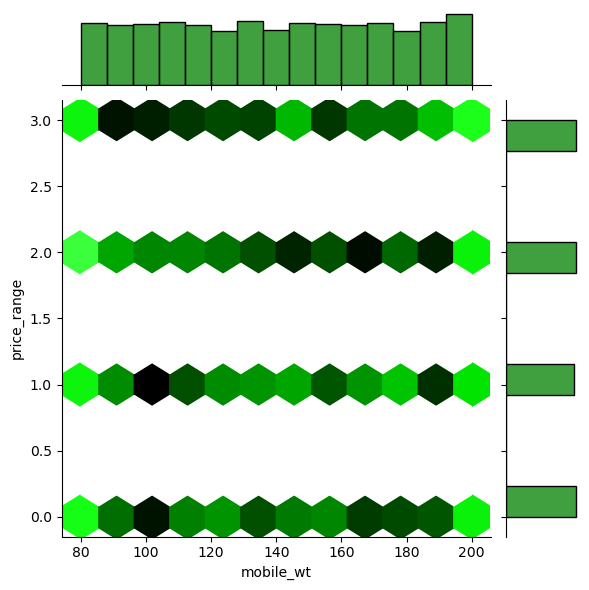

In [51]:
sns.jointplot(x='mobile_wt', y='price_range', data=dataFrame, color='green', kind='hex')

#### La larghezza del dispositivo non influisce.
Di conseguenza, provvederemo all'eliminazione di 'mobile_wt' dal dataset.

In [52]:
dataFrame.drop(columns=["mobile_wt"], inplace=True)

#### Calcoliamo il grado di influenza dell'attributo 'clock_speed', il quale rappresenta la velocità con cui il microprocessore esegue le istruzioni.

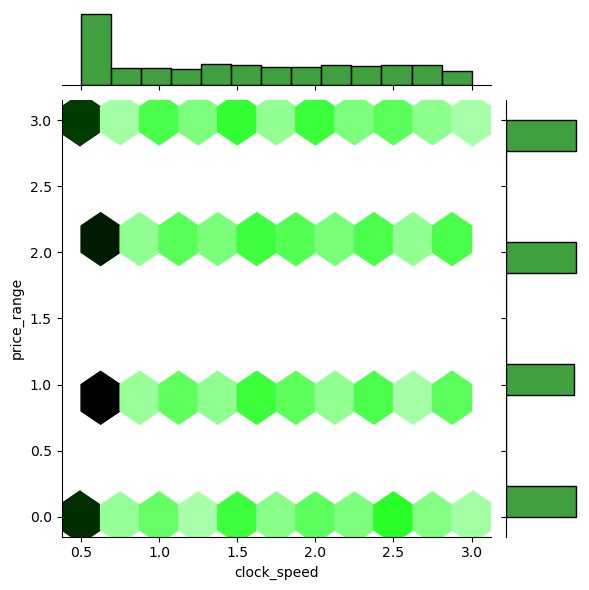

In [53]:
sns.jointplot(x='clock_speed', y='price_range', data=dataFrame, color='green', kind='hex')

#### La velocità del microprocessore non influisce.
Di conseguenza, provvederemo all'eliminazione di 'clock_speed' dal dataset.

In [54]:
dataFrame.drop(columns=["clock_speed"], inplace=True)

#### Calcoliamo il grado di influenza degli attributi 'sc_w' e 'sc_h', i quali rappresentano la larghezza e l'altezza dello schermo del telefono (in cm).

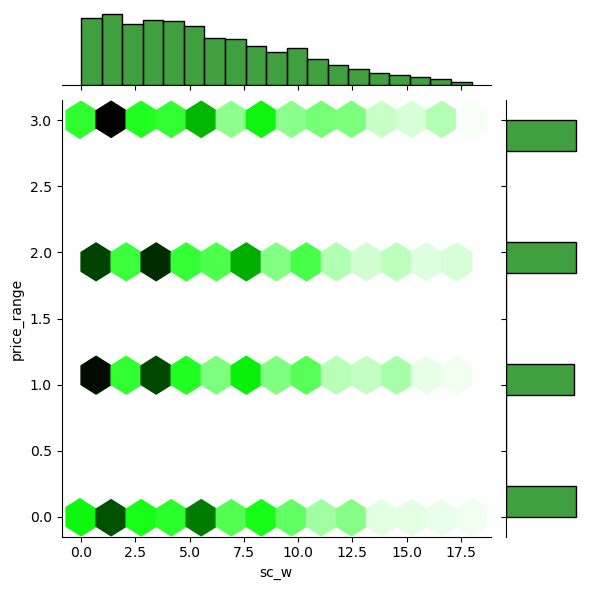

In [55]:
sns.jointplot(x='sc_w', y='price_range', data=dataFrame, color='green', kind='hex')

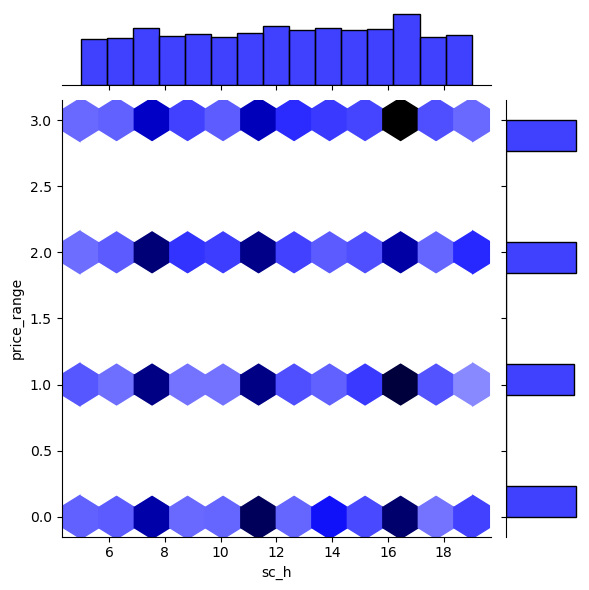

In [56]:
sns.jointplot(x='sc_h', y='price_range', data=dataFrame, color='blue', kind='hex')

#### La larghezza e altezza dello schermo non influiscono tanto.
Di conseguenza provvederemo all'eliminazione di 'sc_w' e 'sc_h'

In [57]:
dataFrame.drop(columns=["sc_w", "sc_h"], inplace=True)

#### Quando i cellulari vengono pubblicizzati, il numero dei megapixel indicato, di solito, è in realtà la somma dei megapixel della fotocamera frontale e di quella posteriore.
Andremo quindi a definire un nuovo attributo che si comporterà come descritto.

In [58]:
dataFrame["camera"] = dataFrame["fc"] + dataFrame["pc"]
dataFrame.drop(columns=["fc", "pc"], inplace=True)
dataFrame

,battery_power,blue,dual_sim,four_g,int_memory,ram,talk_time,three_g,touch_screen,wifi,price_range,camera
0,842,0,0,0,7,2549,19,0,0,1,1,3
1,1021,1,1,1,53,2631,7,1,1,0,2,6
2,563,1,1,1,41,2603,9,1,1,0,2,8
3,615,1,0,0,10,2769,11,1,0,0,2,9
4,1821,1,0,1,44,1411,15,1,1,0,1,27
...,...,...,...,...,...,...,...,...,...,...,...,...
2995,1700,1,0,1,54,2121,15,1,1,0,2,17
2996,609,0,1,0,13,1933,19,0,1,1,1,2
2997,1185,0,0,1,8,1223,14,1,0,0,1,13
2998,1533,1,1,0,50,2509,6,0,1,0,2,12


#### Calcoliamo il grado di influenza del nuovo attributo 'camera', il quale rappresenta il numero dei megapixel totali della fotocamera anteriore e posteriore.

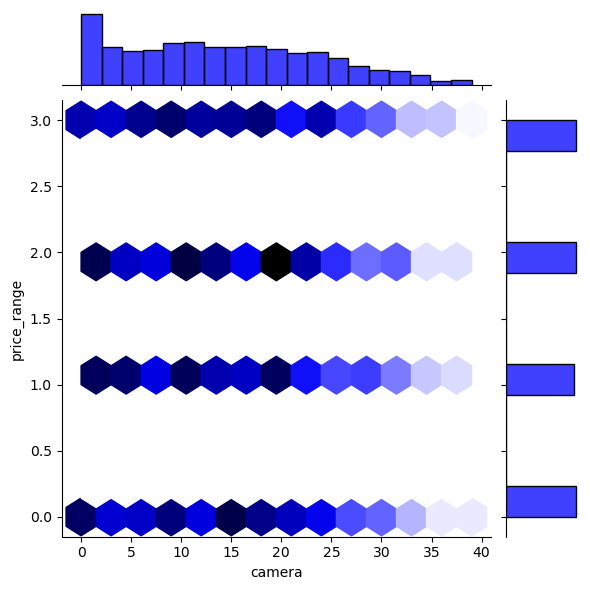

In [59]:
sns.jointplot(x='camera', y='price_range', data=dataFrame, color='blue', kind='hex')

#### Anche tenendo in considerazione la poca influenza dell'attributo 'camera', terremo comunque in considerazione questo attributo.

##### Ecco il Dataset dopo alcune modifiche e cancellazioni delle variabili dipendenti.

In [60]:
dataFrame.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
battery_power,3000.0,1241.849000,437.063804,500.0,863.75,1232.0,1619.00,1999.0
blue,3000.0,0.502000,0.500079,0.0,0.00,1.0,1.00,1.0
dual_sim,3000.0,0.512000,0.499939,0.0,0.00,1.0,1.00,1.0
four_g,3000.0,0.510000,0.499983,0.0,0.00,1.0,1.00,1.0
int_memory,3000.0,32.581667,18.152810,2.0,16.00,33.0,48.00,64.0
ram,3000.0,2129.141333,1085.694231,256.0,1212.75,2147.5,3065.25,3998.0
talk_time,3000.0,11.035667,5.474400,2.0,6.00,11.0,16.00,20.0
three_g,3000.0,0.759667,0.427357,0.0,1.00,1.0,1.00,1.0
touch_screen,3000.0,0.502000,0.500079,0.0,0.00,1.0,1.00,1.0
wifi,3000.0,0.507000,0.500034,0.0,0.00,1.0,1.00,1.0


# Feature Scaling
### Normalizzazione
Eliminiamo prima la variabile indipendente dal dataset e la salviamo in una variabile 'y' che la rappresenterà per le successive operazioni di implementazione degli algoritmi.

In [61]:
dataFrame2 = dataFrame.drop(columns=["price_range"])
y = dataFrame["price_range"]

Procediamo con la normalizzazione

In [62]:
normalizer = MinMaxScaler()
transformer = normalizer.fit(dataFrame2)
normalizedDataFrame = transformer.transform(dataFrame2)


Stampiamo il dataset con tutti i campi normalizzati nell'intervallo [0-1].

In [63]:
pd.DataFrame(normalizedDataFrame, columns=dataFrame.drop(columns=["price_range"]).columns).describe().transpose()

,count,mean,std,min,25%,50%,75%,max
battery_power,3000.0,0.494896,0.291570,0.0,0.242662,0.488326,0.746498,1.0
blue,3000.0,0.502000,0.500079,0.0,0.000000,1.000000,1.000000,1.0
dual_sim,3000.0,0.512000,0.499939,0.0,0.000000,1.000000,1.000000,1.0
four_g,3000.0,0.510000,0.499983,0.0,0.000000,1.000000,1.000000,1.0
int_memory,3000.0,0.493253,0.292787,0.0,0.225806,0.500000,0.741935,1.0
ram,3000.0,0.500572,0.290137,0.0,0.255679,0.505478,0.750735,1.0
talk_time,3000.0,0.501981,0.304133,0.0,0.222222,0.500000,0.777778,1.0
three_g,3000.0,0.759667,0.427357,0.0,1.000000,1.000000,1.000000,1.0
touch_screen,3000.0,0.502000,0.500079,0.0,0.000000,1.000000,1.000000,1.0
wifi,3000.0,0.507000,0.500034,0.0,0.000000,1.000000,1.000000,1.0


### DATA BALANCING
Vediamo quanto è bilanciato il nostro dataset rispetto alla variabile indipendente 'price_range'.

<AxesSubplot: xlabel='price_range', ylabel='Count'>

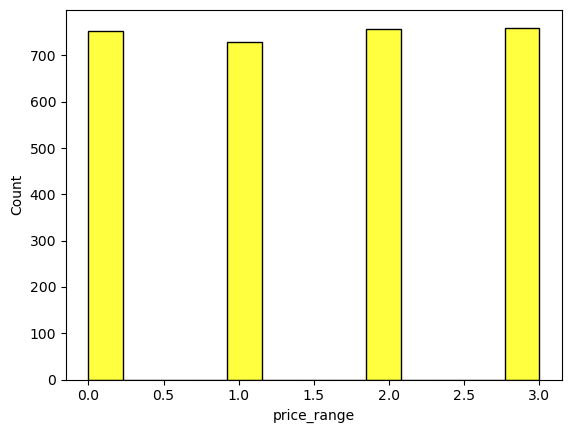

In [64]:
sns.histplot(dataFrame["price_range"], legend=True, color="yellow")

Il Dataset è bilanciato, in quanto possiamo vedere dal grafico, che il numero di istanze dei diversi range sono quasi uguali fra di loro.

### Naive Bayes
Per prima cosa dividiamo il "normalizedDataFrame" in 2 parti: un set di addestramento(X_train e Y_train) e un set di test(X_test e Y_Test) di modo che il test set sia il 33% di "normalizedDataFrame".

Creiamo poi un classificatore Naive Bayes Gaussiano

Infine lo addestriamo con i valori del training set e lo usiamo per predire i valori di "X_test".
Tali previsioni vengono salvate in "y_pred".

In [65]:
X_train, X_test, Y_train, Y_test = train_test_split(normalizedDataFrame, y, test_size=0.33, random_state=0)

gnb = GaussianNB()

y_pred = gnb.fit(X_train, Y_train).predict(X_test)

A questo punto, verifichiamo quanti valori predetti in "y_pred" non coincidono con i valori effettivamenti presenti nel test set "Y_test".

In [66]:
print("Numero di punti etichettati erroneamente su un totale di %d punti : %d"% (X_test.shape[0], (Y_test != y_pred).sum()))

Numero di punti etichettati erroneamente su un totale di 990 punti : 224


## Metriche di valutazione
# Precisione
La precisione indica la percentuale di previsioni positive effettivamente corrette rispetto al numero totale di previsioni positive. In altre parole, la precisione misura quante delle previsioni positive effettuate dal modello sono corrette. Un alto valore di precisione significa che il modello ha un basso tasso di falsi positivi, ovvero previsioni positive errate.
La precisione è il rapporto tra il numero di previsioni positive corrette e il numero totale di previsioni positive.

In [67]:
precision_score(Y_test, y_pred, average='macro')

0.767792900551985

## Accuratezza
L'accuratezza indica la percentuale di previsioni corrette rispetto al numero totale di esempi. In altre parole, l'accuratezza misura quante previsioni effettuate dal modello sono corrette.
L'accuratezza è il rapporto tra il numero di previsioni corrette e il numero totale di previsioni.

In [68]:
accuracy_score(Y_test, y_pred)

0.7737373737373737

## Recall
Il recall indica la percentuale di esempi positivi effettivamente individuati dal modello rispetto al numero totale di esempi positivi. In altre parole, il recall misura quanti degli esempi positivi presenti nei dati sono stati individuati dal modello.
Il recall è il rapporto tra il numero di veri positivi e il numero di veri positivi più falsi negativi

In [69]:
recall_score(Y_test, y_pred, average='micro')

0.7737373737373737

### Decision Tree

#### Creiamo un classificatore Basato sul Decision Tree, denominato "dtc".
#### Utilizzando il test di addestramento(X_train e Y_train) e un set di test(X_test e Y_test) ottenuti in precedenza, per poi procedere con l'addestramento tramite i valori contenuti in "X_test", salvando i risultati nella variabile "y_pred".

In [70]:
dtc = DecisionTreeClassifier()

dtc.fit(X_train, Y_train)

y_pred = dtc.predict(X_test)

Come fatto in precedenza, verifichiamo quanti valori predetti in "y_pred" non coincidono con i valori effettivamenti presenti nel test set "Y_test".

In [71]:
print("Number of mislabeled points out of a total %d points : %d"% (X_test.shape[0], (Y_test != y_pred).sum()))

Number of mislabeled points out of a total 990 points : 245


##### Per valutare la bontà delle predizioni utilizziamo tre metriche:
precision, accuracy e recall

In [72]:
precision_score(Y_test, y_pred, average='macro')

0.7475719857172296

In [73]:
accuracy_score(Y_test, y_pred)

0.7525252525252525

In [74]:
recall_score(Y_test, y_pred, average='micro')

0.7525252525252525

# Rete neurale: Multilayer Perceptron
Il codice crea un oggetto di una classe Multi Layer Perceptron (MLP) utilizzando la classe MLPClassifier di scikit-learn.

Il parametro alpha specifica il coefficiente di regolarizzazione L2 utilizzato nell'algoritmo di addestramento. Il coefficiente di regolarizzazione cerca di evitare overfitting penalizzando i pesi elevati nel modello. Il coefficiente di regolarizzazione L2 introduce una penalità sui pesi del modello, facendo in modo che i pesi siano più piccoli. Ciò rende il modello meno complesso e più in grado di generalizzare. La penalità è data dalla somma dei quadrati dei pesi del modello moltiplicata per un fattore di regolarizzazione, detto lambda.

Il parametro hidden_layer_sizes specifica la dimensione degli strati nascosti nella rete neurale MLP, in questo caso (128, 4) indica che ci saranno due strati nascosti con 128 e 4 neuroni rispettivamente.

Il parametro random_state imposta un seme per la generazione casuale dei pesi iniziali nella rete neurale, in modo che i risultati possono essere riprodotti.

Il parametro max_iter specifica il numero massimo di iterazioni per convergere.

Infine addestriamo il modello, similmente a quanto fatto in precedenza

In [75]:
mlp = MLPClassifier(alpha=0.25, hidden_layer_sizes=(128, 4), random_state=1, max_iter=24000)
mlp.fit(X_train, Y_train)

MLPClassifier(alpha=0.25, hidden_layer_sizes=(128, 4), max_iter=24000,
              random_state=1)

Quindi, anche in questo caso, usiamo il modello per predire i valori di "X_test".
Tali previsioni vengono salvate in "y_pred".

In [76]:
y_pred = mlp.predict(X_test)

Infine, procediamo con la verifica di quanti valori predetti in "y_pred" non coincidono con i valori effettivamenti presenti nel test set "Y_test".

In [77]:
print("Numero di punti etichettati erroneamente su un totale di %d punti : %d"% (X_test.shape[0], (Y_test != y_pred).sum()))

Numero di punti etichettati erroneamente su un totale di 990 punti : 180


# Metriche di valutazione
## Precisione

In [78]:
recall_score(Y_test, y_pred, average='macro')

0.8161575290394795

## Accuratezza

In [79]:
accuracy_score(Y_test, y_pred)

0.8181818181818182

## Recall

In [80]:
recall_score(Y_test, y_pred, average='micro')

0.8181818181818182